# 4. Цифровая обработка бинарных изображений

## 4.1. Геометрические преобразования изображений

### 4.1.1. Изменение размера изображения

In [326]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [327]:
# Функция для вывода изображения
def img_print(original, res):
    pose = [121, 122]
    signature = ["Оригинал", "Измененное"]
    img = [original, res]
    i = 0
    while i < 2:
        plt.subplot(pose[i])
        plt.title(signature[i])
        plt.imshow(img[i])
        i += 1


In [328]:
img = cv2.imread('img/cat_art.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Resized Dimensions :  (320, 240, 3)


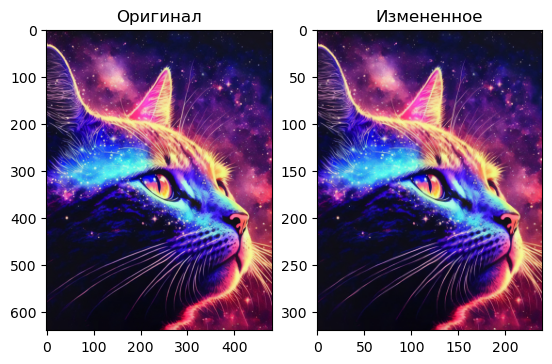

In [329]:
#Первый способ изменения размера задается в процентах
scale_percent = 50  # процент изменения
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation=
cv2.INTER_AREA)
print('Resized Dimensions : ', resized.shape)
img_print(img, resized)

Original Dimensions :  (640, 480, 3)
Resized Dimensions :  (71, 58, 3)


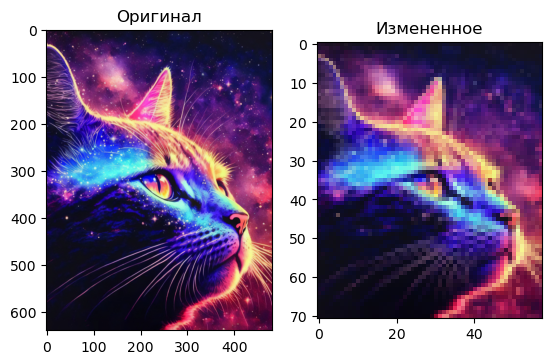

In [330]:
# Второй способ изменения размера задается вручную
print('Original Dimensions : ', img.shape)
width = 58
height = 71
dim1 = (width, height)
# resize image
resized1 = cv2.resize(img, dim1, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized1.shape)
img_print(img, resized1);

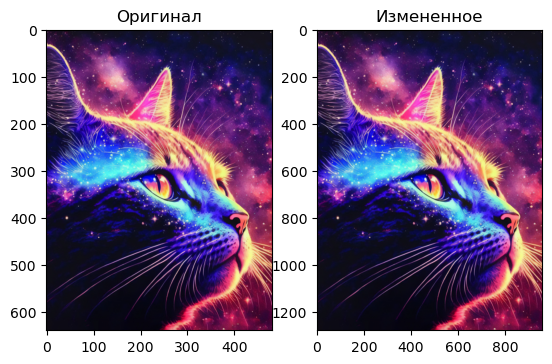

In [331]:
#третий способ: задается коэффициентом масштабирования
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
img_print(img, res);

### 4.1.2. Сдвиг, смещение местоположения объекта


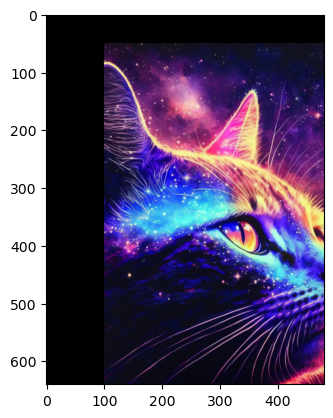

In [332]:
rows, cols, colors = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst);

### 4.1.3. Вращение изображения


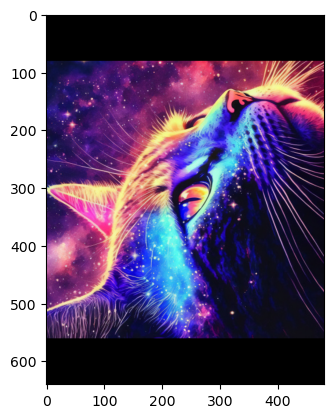

In [333]:
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst);

### 4.1.4. Аффинная трансформация изображения


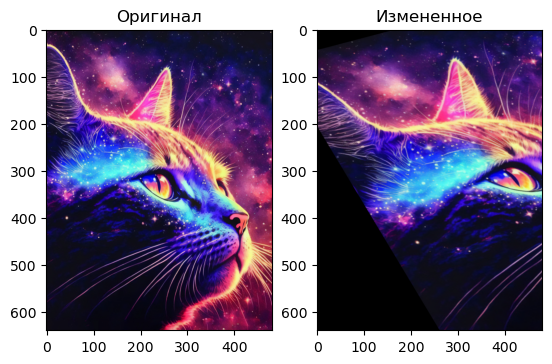

In [334]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

img_print(img, dst);
plt.show()

## 4.2. Способы получения дополнительных характерных признаков бинарных изображений

### 4.2.1. Охват объекта повернутым прямоугольником

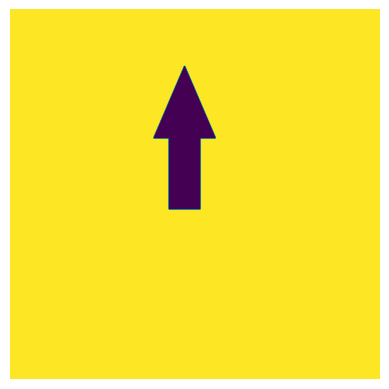

In [335]:
img = cv2.imread('img/str.jpg', 0)
plt.axis('off')
plt.imshow(img);

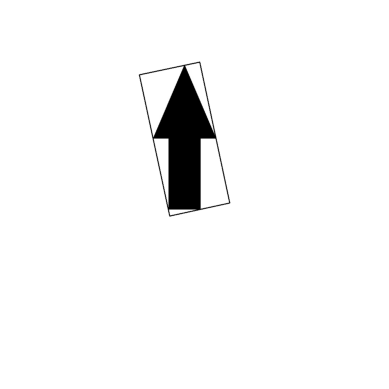

In [336]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.intp(box)

imp = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

### 4.2.2. Заключение изображения в круг с минимальной лощадью


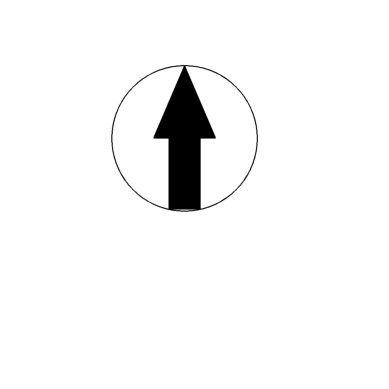

In [337]:
image = cv2.imread('img/str.jpg', 0)

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)

imp = cv2.circle(image, center, radius, (0, 255, 0), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

### 4.2.3. Заключение изображения в эллипс с минимальной площадью

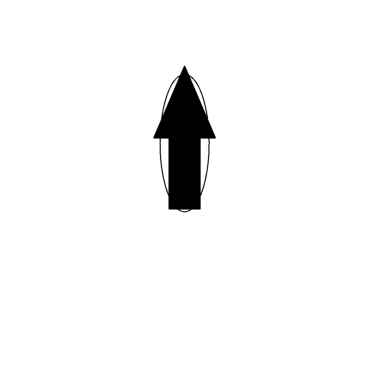

In [338]:
image = cv2.imread('img/str.jpg', 0)

ellipse = cv2.fitEllipse(cnt)
imag = cv2.ellipse(image, ellipse, (0, 255, 0), 2)

imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imag);

### 4.2.4. Установка прямой линии в направлении оси симметрии

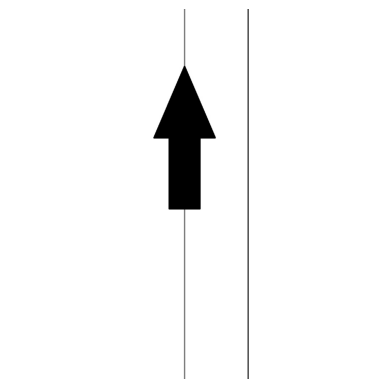

In [339]:
img = cv2.imread('img/str.jpg', 0)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
inv = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(inv, 1, 1)
cnt = contours[0]
rows, cols = inv.shape[:2]

[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)

lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)

img = cv2.line(img, (cols - 1, righty), (0, lefty), (0, 255, 0), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

### 4.2.5. Создание выпуклой оболочки вокруг контура


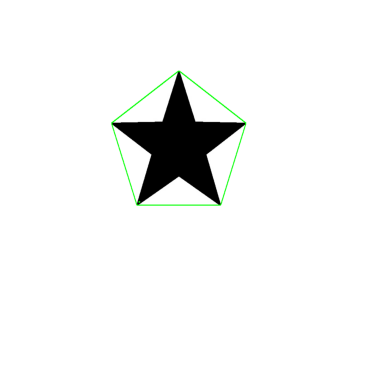

In [340]:
image = cv2.imread('img/star.jpg')
original_image = image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 200)
contours, hierarchy = cv2.findContours(edges.copy(),
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    hull = cv2.convexHull(cnt)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(image);

### 4.2.6. Аппроксимация контура


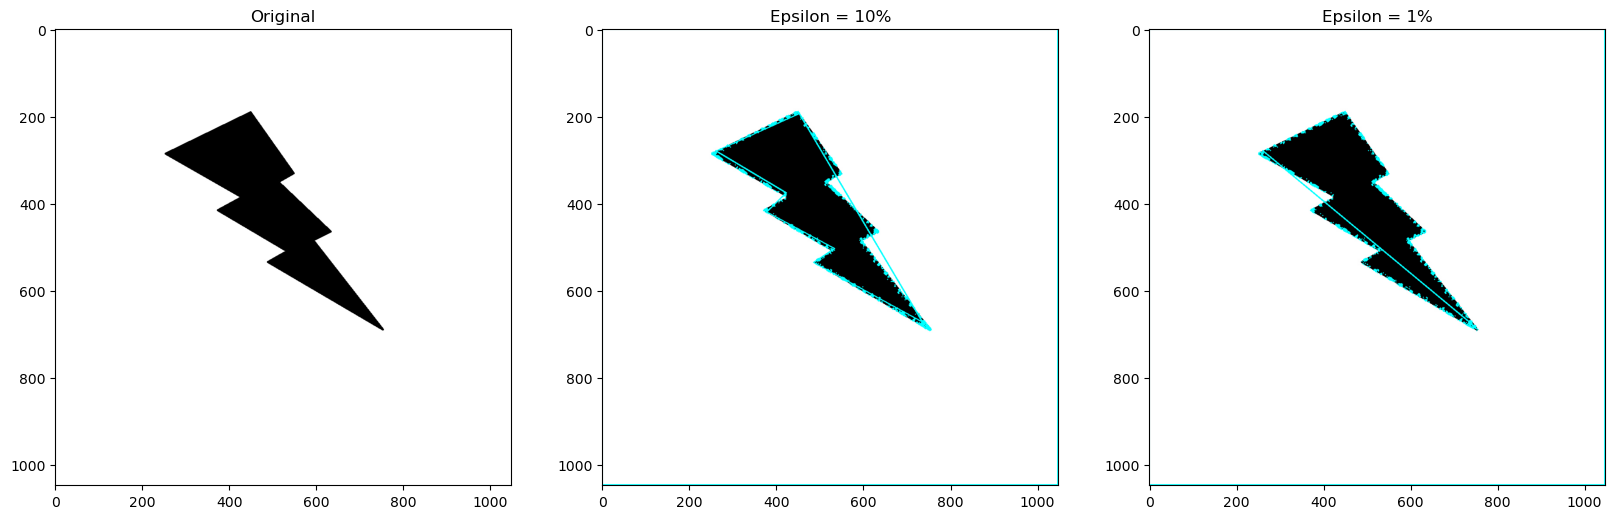

In [341]:
img = cv2.imread('img/zip.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

imag = cv2.imread('img/zip.jpg')

f = plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, 'gray')

plt.subplot(1, 3, 2)
plt.title('Epsilon = 10%')
for i in range(np.size(contours)):
    cnt = contours[i]
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imag, [approx], -1, (0, 255, 255), 2)
plt.imshow(imag)

plt.subplot(1, 3, 3)
plt.title('Epsilon = 1%')
imAg = cv2.imread('img/zip.jpg')
for i in range(np.size(contours)):
    cnt = contours[i]
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imAg, [approx], -1, (0, 255, 255), 2)
plt.imshow(imAg);
plt.show();

### 4.2.7. Выделение на изображении интересующей области, создание для нее отдельного изображения



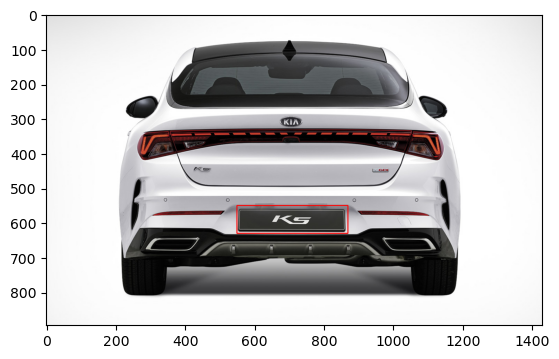

In [342]:
img = cv2.imread('img/car.jpg', 1)
image = cv2.rectangle(img, (550, 630), (870, 550), (0, 0, 255), 2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

200 100


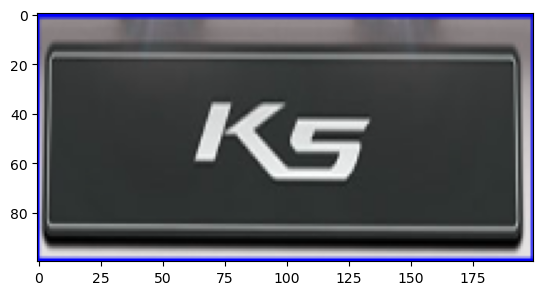

In [343]:
crop = img[550:630, 550:870]
piece = cv2.resize(crop, (200, 100), interpolation=cv2.INTER_LINEAR)

(h, w) = piece.shape[:2]
print(w, h)

plt.imshow(piece);

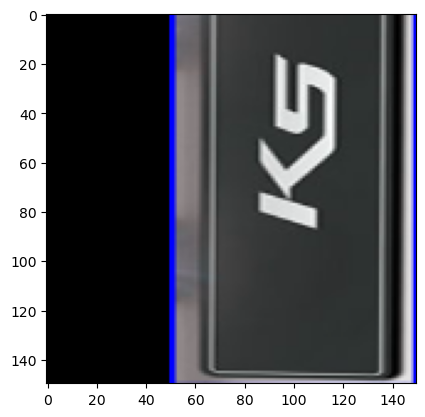

In [344]:
plt.imshow(piece);
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 90, 1)
rotated = cv2.warpAffine(piece, M, (150, 150))

plt.imshow(rotated);